In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/superstore_dataset2011-2015 (1).csv',encoding='latin-1',thousands=',',delimiter=',')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,OrderPriority
0,34662,CA-2011-115161,01/02/2011,03/02/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,34.196,54.64,High
1,37844,CA-2011-113880,01/03/2011,05/03/2011,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,Illinois,...,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.30,-1.721.172,70.05,High
2,31454,CA-2011-104269,01/03/2011,06/03/2011,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,Washington,...,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.20,514.764,47.89,Medium
3,39607,CA-2011-168312,01/03/2011,07/03/2011,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,Texas,...,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.30,-430.296,32.70,Medium
4,39245,CA-2011-131009,01/03/2011,05/03/2011,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,...,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.25,6,0.30,0,25.22,Medium


In [ ]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [ ]:
#Xóa giá trị null trong các trường
df.dropna(subset=['Sales', 'Quantity', 'Discount', 'Profit', 'OrderPriority'], inplace=True)
discount_dtype = df['Sales'].dtype
print(discount_dtype)

float64


In [ ]:
features = df[['Sales', 'Quantity','Discount','Profit']]
labels = df['OrderPriority']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Dự đoán nhãn của các điểm dữ liệu trong tập kiểm tra
y_pred = rf.predict(X_test)

In [ ]:
# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49347116430903154


In [ ]:
# Trực quan hóa mức độ quan trọng của các thuộc tính
importance = rf.feature_importances_
feature_names = features.columns


In [ ]:
# Sắp xếp các thuộc tính theo mức độ quan trọng giảm dần
indices = importance.argsort()[::-1]
sorted_names = [feature_names[i] for i in indices]
sorted_importance = importance[indices]

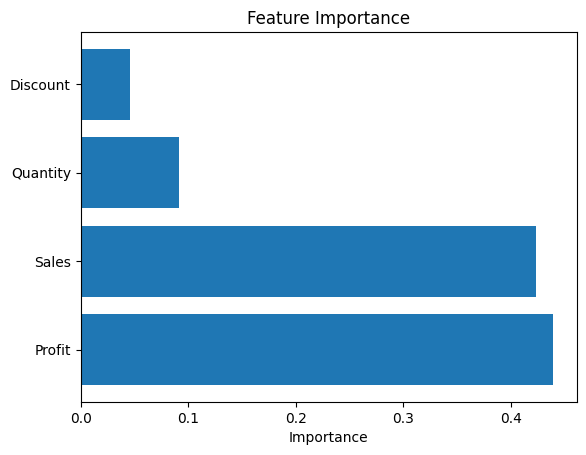

In [ ]:
# Vẽ biểu đồ cột
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_names)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()